In [37]:
!python process_data.py

/Users/adorman/Documents/master-thesis/src/utils_data_preprocessing.py:91: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['middle_peak'] = round((adata.var.end - adata.var.start)/2 + adata.var.start).astype('uint32')
View of AnnData object with n_obs × n_vars = 45 × 499870
    var: 'chr', 'start', 'end', 'middle_peak', 'sequence'
/Users/adorman/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/Users/adorman/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


2145
1027
942.7429406037


<Axes: >

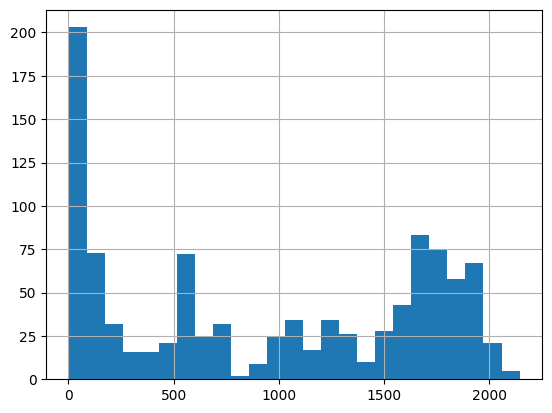

In [27]:
print(np.max(count_N))
print(np.sum(count_N >0))
print(np.mean(count_N[count_N>0]))

count_N[count_N>0].hist(bins=25)

In [51]:
test = np.array([[0, 1, 3], [0, 5, 2]])
total = test.sum(axis=1)
print(test)
print(total)

(test.T/total * 100000).T.shape



[[0 1 3]
 [0 5 2]]
[4 7]


(2, 3)

Distribution peak length

852.3285106759125


2263
878.0
(6,)


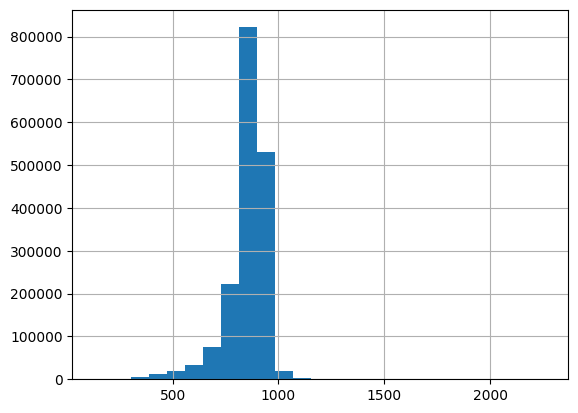

In [33]:
len_peak = adata.var.end - adata.var.start 
print(len_peak.mean())

len_peak.hist(bins=25)

print(len_peak.max())
print(len_peak.median())
print(len_peak[len_peak > 2000].shape)


In [41]:
import pyfaidx
from utils_data_preprocessing import *
test = adata[:,0:1000]

fetch_sequence(test, path_genome='../data/hg38.fa')

/Users/adorman/Documents/master-thesis/src/utils_data_preprocessing.py:86: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['middle_peak'] = round((adata.var.end - adata.var.start)/2 + adata.var.start).astype('uint32')


In [42]:
test.var

,chr,start,end,middle_peak,sequence
peakID,,,,,
10:100004794-100005512,10,100004794,100005512,100005153,atgaataagaagtataagaatgggaaagggctgggcacggtggctc...
10:100004820-100005525,10,100004820,100005525,100005172,atgggaaagggctgggcacggtggctcaggcctgtaatcccagcac...
10:100004829-100005566,10,100004829,100005566,100005198,caggcctgtaatcccagcactttgggaggccaaggcacgtggatca...
10:100005947-100006870,10,100005947,100006870,100006408,TAGCCtggtaaacttattccaaattttatatggaaaaaataaattt...
10:100005972-100006890,10,100005972,100006890,100006431,ttttatatggaaaaaataaattttggtccaggaagagctaaataaa...
...,...,...,...,...,...
10:101067459-101068307,10,101067459,101068307,101067883,TATGGCTGGAGGGAAGTTATCTTCCCCGTCTGCCCTCCATTGGGGC...
10:101067477-101068229,10,101067477,101068229,101067853,CCCGCCTTTGAGGGAGGGAGGCTGGAGCCATATGGCTGGAGGGAAG...
10:101067507-101068275,10,101067507,101068275,101067891,GAGGGAAGTTATCTTCCCCGTCTGCCCTCCATTGGGGCTGATATAC...


In [3]:
import numpy as np
np.mean(test.var.end - test.var.start)

NameError: name 'test' is not defined

In [49]:
def one_hot_encode(seq):
    mapping = dict(zip("ACGT", range(4)))    
    seq2 = [mapping[i] for i in seq]
    return np.eye(4)[seq2]

def encode_sequence(adata):
    
    #Capitalize all sequence
    adata.var.sequence = adata.var.sequence.str.upper()
    
    #One hot encode the the sequence
    return [one_hot_encode(seq) for seq in adata.var.sequence]

test.var['encoded_seq'] = encode_sequence(test)
test.var

,chr,start,end,middle_peak,sequence,encoded_seq
peakID,,,,,,
10:100004794-100005512,10,100004794,100005512,100005153,ATGAATAAGAAGTATAAGAATGGGAAAGGGCTGGGCACGGTGGCTC...,"[[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [..."
10:100004820-100005525,10,100004820,100005525,100005172,ATGGGAAAGGGCTGGGCACGGTGGCTCAGGCCTGTAATCCCAGCAC...,"[[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [..."
10:100004829-100005566,10,100004829,100005566,100005198,CAGGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGCACGTGGATCA...,"[[0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [..."
10:100005947-100006870,10,100005947,100006870,100006408,TAGCCTGGTAAACTTATTCCAAATTTTATATGGAAAAAATAAATTT...,"[[0.0, 0.0, 0.0, 1.0], [1.0, 0.0, 0.0, 0.0], [..."
10:100005972-100006890,10,100005972,100006890,100006431,TTTTATATGGAAAAAATAAATTTTGGTCCAGGAAGAGCTAAATAAA...,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [..."
...,...,...,...,...,...,...
10:101067459-101068307,10,101067459,101068307,101067883,TATGGCTGGAGGGAAGTTATCTTCCCCGTCTGCCCTCCATTGGGGC...,"[[0.0, 0.0, 0.0, 1.0], [1.0, 0.0, 0.0, 0.0], [..."
10:101067477-101068229,10,101067477,101068229,101067853,CCCGCCTTTGAGGGAGGGAGGCTGGAGCCATATGGCTGGAGGGAAG...,"[[0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [..."
10:101067507-101068275,10,101067507,101068275,101067891,GAGGGAAGTTATCTTCCCCGTCTGCCCTCCATTGGGGCTGATATAC...,"[[0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0], [..."


In [8]:
from sys import getsizeof

start_size = getsizeof(adata)/(1024.0**3)
print('Dataframe size: %2.2f GB'%start_size)

Dataframe size: 0.25 GB


In [44]:
print('total size reduction: %2.1f'%((1-10.01/30.02)*100))

total size reduction: 66.7


In [42]:
dataset.sequence_ATAC.dtypes

peakID         object
ATAC           uint16
cell_type    category
dataset      category
cont_ATAC       int64
chr          category
start          uint32
end            uint32
dtype: object

In [40]:
np.max(dataset.sequence_ATAC.start)

248945549

In [41]:
dataset.sequence_ATAC.ATAC = dataset.sequence_ATAC.ATAC.astype('uint16')

dataset.sequence_ATAC.cell_type = dataset.sequence_ATAC.cell_type.astype("category")
dataset.sequence_ATAC.dataset = dataset.sequence_ATAC.dataset.astype("category")

dataset.sequence_ATAC.chr = dataset.sequence_ATAC.chr.astype("category")
dataset.sequence_ATAC.start = dataset.sequence_ATAC.start.astype("uint32")
dataset.sequence_ATAC.end = dataset.sequence_ATAC.end.astype("uint32")

In [ ]:
start_size = getsizeof(dataset.sequence_ATAC)/(1024.0**3)
print('Dataframe size: %2.2f GB'%start_size)

In [178]:
test = dataset.sequence_ATAC[dataset.sequence_ATAC.dataset == 'D8_1']
test = test[0:1000]
test = test.drop(columns='cont_ATAC')

tracks = get_continous_track(test)
test['cont_ATAC'] = test['peakID'].map(tracks)

test

/var/folders/nx/fx90wvl146lcdkglfty5_wr4qnvn43/T/ipykernel_7937/2981353964.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in peak_metadata.groupby(['cell_type', 'dataset']):


,peakID,ATAC,cell_type,dataset,chr,start,end,cont_ATAC
0,10:100004794-100005512,0,12,D8_1,10,100004794,100005512,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,10:100004820-100005525,0,12,D8_1,10,100004820,100005525,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,10:100004829-100005566,0,12,D8_1,10,100004829,100005566,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,10:100005947-100006870,0,12,D8_1,10,100005947,100006870,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,10:100005972-100006890,0,12,D8_1,10,100005972,100006890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...
995,10:101067459-101068307,0,12,D8_1,10,101067459,101068307,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
996,10:101067477-101068229,0,12,D8_1,10,101067477,101068229,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
997,10:101067507-101068275,0,12,D8_1,10,101067507,101068275,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
998,10:101067510-101068334,0,12,D8_1,10,101067510,101068334,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [9]:
import pandas as pd 

cell_types = pd.read_csv('../results/bam_cell_type/D12_1/D12_1_cell_types.tsv', 
                            sep='\t', header=None)
cell_types.columns = ['barcode','cell_type']

cell_types.groupby('cell_type').count()

,barcode
cell_type,
12,555
14,80
Immature neuron,253
Mesenchymal,5610
Myoblast/Myocytes,908
Myogenic progenitor,1802
Neuroblast,396
Neuronal progenitor,5259
Somite,2376


In [60]:
!python get_sequence_ATAC.py

/Users/adorman/Documents/master-thesis/src/utils_data_preprocessing.py:91: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['middle_peak'] = round((adata.var.end - adata.var.start)/2 + adata.var.start).astype('uint32')


In [2]:
def compute_GC_content(seq):

    return [sum(x.count(n) for n in ("G", "C"))/len(x) for x in seq]


In [55]:
import pickle 

#Get matched GC content background sequence
#--------------------------------------------
with open('../results/peaks_location.pkl', 'rb') as file:
    peaks = pickle.load(file)

peaks['GC_cont'] = compute_GC_content(peaks.sequence)
peaks

,chr,start,end,sequence,GC_cont
peakID,,,,,
10:100004794-100005512,10,100004794,100005512,TAGCCAGGGATGGTGGCACATGCCTGTGGTCTCAGCTACTTGGGAG...,0.393094
10:100004820-100005525,10,100004820,100005525,ATGCCTGTGGTCTCAGCTACTTGGGAGGCTAGAATGGGAGGATCAC...,0.390728
10:100004829-100005566,10,100004829,100005566,GGCTAGAATGGGAGGATCACTTGAGCCTGGGAGGTTGAGGCTGCAG...,0.388363
10:100005947-100006870,10,100005947,100006870,CACAGAGAGCAGATAAAGCAAAACCAATGGATGCAAACAGCATGGG...,0.465468
10:100005972-100006890,10,100005972,100006890,CCAATGGATGCAAACAGCATGGGGTATAAATGCAGCATTCCAAAGC...,0.466887
...,...,...,...,...,...
Y:9320873-9321803,Y,9320873,9321803,TTGGGAGGCCAAGGCAGGTGGATCATGAGGTGAAGAGATAGAGCTC...,0.366131
Y:9320878-9321792,Y,9320878,9321792,ACTTTGGGAGGCCAAGGCAGGTGGATCATGAGGTGAAGAGATAGAG...,0.366604
Y:9589750-9590648,Y,9589750,9590648,ACTCTACACAAAATCTTCTAGAAAATTAAAAGGAGAGAATGCTATC...,0.429044


<Axes: >

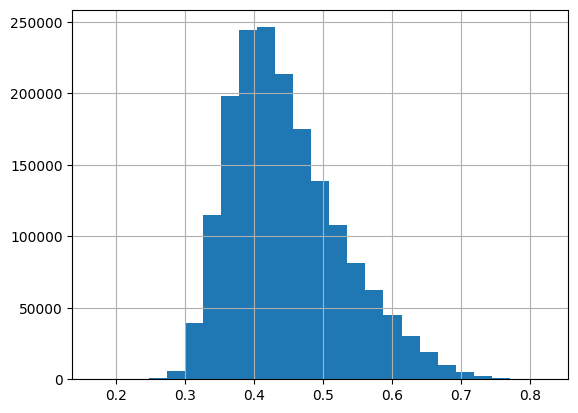

In [56]:
peaks.GC_cont.hist(bins=25)

In [57]:
peaks = peaks.iloc[:1000]

In [131]:
peaks

,chr,start,end,sequence,GC_cont
peakID,,,,,
10:10038071-10038951,10,10038071,10038951,CCAGCCCGGCTATTTTTTGTATTTTATTATTTTATTTTTTTTGAGA...,0.314570
10:10038066-10038922,10,10038066,10038922,TTACAGGCGTGCCCCACCCAGCCCGGCTATTTTTTGTATTTTATTA...,0.316935
10:10039526-10040280,10,10039526,10040280,TTATCAATTATTATTACTTAATGCTTATCTGTTTAAACAACATAAA...,0.328288
10:100930072-100930940,10,100930072,100930940,TTTCATAATGTATTTTACCTTATTAAAGTTTTTACATTTTTTAGTT...,0.336802
10:100930084-100930981,10,100930084,100930981,AGTTTTTACATTTTTTAGTTTTGTTTTTGTAAAATAAATGGGCCAT...,0.338221
...,...,...,...,...,...
10:100999173-101000004,10,100999173,101000004,TGCTCCTTCCTGGGGCCCGGGCGAGCTCCGGCAGGCCTTGGCCCTG...,0.674078
10:100999161-101000034,10,100999161,101000034,TGGGGCCCGGGCGAGCTCCGGCAGGCCTTGGCCCTGCGGGGGAGGG...,0.674078
10:100999155-101000029,10,100999155,101000029,CCTTCCTGGGGCCCGGGCGAGCTCCGGCAGGCCTTGGCCCTGCGGG...,0.674551


In [132]:
random_seq

,chr,start,sequence,GC_cont,df2_col
36351,chr10,8268386,TCATTGCCTGGAATAGTGCCTGACACTGATTAAGCAGTCAAACAGA...,0.145222,random_seq
19158,chr10,76616672,CATTATACATATAATTATGTATAATATAATATATAATATATTATCA...,0.147114,random_seq
661,chr10,8268038,GCTTCAAAATAAACCAAGAACAAGAACATCTGAAACAAAACCGACA...,0.151845,random_seq
7606,chr10,76615631,ATATGAAAAAAATGCTCAACATCACTAATCATCAGAGAAATGCAAA...,0.176443,random_seq
47077,chr10,65086581,TTGAAATAAAGAATAAAAATTAAAAAAATATGACTTGCCATATGTG...,0.177862,random_seq
...,...,...,...,...,...
19597,chr10,133677596,TCGCCCACACCGGCGCGTGGGGAACGGGGCTTCCCGCACCCCACGT...,0.734626,random_seq
35904,chr10,133680445,GACCCCGAGCCAAAGCGAGGCCCTGCGAGCCTGCTTTGAGCGGAAC...,0.739357,random_seq
41424,chr10,132784808,CGACGGGGACCCGTTAAATAATTTATTGATGATACAAAGCGACTCG...,0.739357,random_seq
29429,chr10,930896,GGCAAGGCTGGCGCCGCACTGCGGGTGCCGGCGCCCGCCCGGCCTG...,0.768685,random_seq


In [136]:
random_seq

,chr,start,sequence
0,chr10,127949857,AGGCTAGAGACATTGAGCTCAGAAATTCTGATGAGTCTTATTTGCT...
1,chr10,95709853,CTCCTGGGTTCAAGCAATTCTCCTGCCTTAGCCCCGGCCCCCCCCA...
2,chr10,113364547,CTGAATTCACCAGTGAACTGCAGACAAAGTGTGTCTGACGGCTTGT...
3,chr10,54826851,CTCCCTAGAAGGTATCAAAAATTGTTCCTAACATACTTTTCTAGTG...
4,chr10,63341481,CTTCCTATGACAGGCAAAAACTTGTGTCCTCCCTGTTTTCGAGGAG...
...,...,...,...
1995,chr10,79542167,TCCACCTGTAGGGAGAGTAGCCCTATAAGGTTCTCTTTATATCATA...
1996,chr10,1737510,GCACCAGCCACTTTGAAGCCAATCACGCAGGGAGCTTGTCTATTTG...
1997,chr10,64834372,AGCTTGCTGTCTAGAATTTCTTTCCCTTTGCTTGCACATCTCCCAA...
1998,chr10,36421264,TCACCCAGGCTGGCGCAATCTCAGCTCACTGTAAGCTCCGCCTCCC...


In [152]:
import pandas as pd
import numpy as np

import pyfaidx

len_seq = 2114
path_genome = '../data/hg38.fa'

#Get size of each chromosome, so that truly random
size_chrom = pd.read_csv('../data/size_genome.txt', sep='\t', header=None, index_col=0)
size_chrom = size_chrom.loc[['chr' + c for c in np.unique(peaks.chr)]]

#Generate random start location on chromosome
p_chrom = (size_chrom/np.sum(size_chrom)).iloc[:,0].tolist()
rand_chr = np.random.choice(size_chrom.index, p=p_chrom, size=peaks.shape[0]*2)
rand_start = [np.random.randint(low=1, high=size_chrom.loc[x]-len_seq) for x in rand_chr]
rand_start = [int(x) for x in rand_start]

random_seq = pd.DataFrame({"chr":rand_chr, "start":rand_start})

#Get sequence on genome of random locations
genome = pyfaidx.Fasta(path_genome)
sequences =  random_seq.apply(lambda x: (genome[x['chr']][x['start']:(x['start']+len_seq)]).seq, axis=1)
sequences = sequences.str.upper()
random_seq['sequence'] = sequences

#Remove sequence with N 
random_seq = random_seq[np.logical_not(random_seq.sequence.str.contains("N"))]

#Check if inside peak
def check_whithin_peaks(location, peaks_df):
    within_regions = any(
        (peaks_df['chr'] == location.chr[3:]) & 
        (peaks_df['start'] <= location.start) & 
        (peaks_df['end'] >= location.start))

    return within_regions

random_seq = random_seq[~random_seq.apply(lambda s: check_whithin_peaks(s, peaks), axis=1)]

#Compute GC content
random_seq['GC_cont'] = compute_GC_content(random_seq.sequence)
random_seq


/Users/adorman/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/var/folders/nx/fx90wvl146lcdkglfty5_wr4qnvn43/T/ipykernel_81726/4118540026.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rand_start = [int(x) for x in rand_start]


,chr,start,sequence,GC_cont
0,chr10,11381327,GTCAGTGTCATAGCTGCATTGAAGACACCCAGGTGGGGTCCAGAGA...,0.526963
1,chr10,23623615,AGGGCTCCGTGCTCCTAAATTTGTGCTTTTCTGCTGATCTATTTCC...,0.393567
2,chr10,81322615,GGATGCTTTTTTTTTTTATCCTAAGGATTTTTGTTCTATATTTAGT...,0.258278
3,chr10,13778520,TTGGTGGAACTATTCTGTGCAGTGAATGTGTTGAGGTAGTTACAGA...,0.434248
4,chr10,40992144,CTATCTTAGACATGGAAATATCTTCATATTAAAAGTACACAGAAGT...,0.381741
...,...,...,...,...
1995,chr10,80796347,AAGACCTGAAAGAGTGCCAAGAAGGAAGAGATCATTTTTGACTAGG...,0.460738
1996,chr10,64247605,TTTATTGACATGATAATCAATACATGTAAATTAGGTCAAGCTTGTT...,0.419584
1997,chr10,86166760,TCAGTCCTCACAGCCATGTCTAAGCTTTTGCTGGGCAGTCTCTATT...,0.558184
1998,chr10,21288160,TAACAAGACATGAAAATCATTGCTGCCAGCCGGGCATGGTGGCTAA...,0.456008


In [128]:
#Match each peak sequence to its closest GC content 
peaks = peaks.sort_values('GC_cont')
random_seq = random_seq.sort_values('GC_cont')
random_seq['df2_col'] = 'random_seq'

merged_df = pd.merge_asof(random_seq, peaks.reset_index(), on='GC_cont', direction='nearest', suffixes=('','_peak'), tolerance=5e-2)
merged_df = peaks.merge(merged_df[['peakID','start','sequence']], how='left', left_index=True, right_on='peakID').set_index('peakID')
merged_df = merged_df[~merged_df.index.duplicated(keep='first')]
merged_df['GC_cont_y'] = [sum(x.count(n) for n in ("G", "C"))/len(x) if isinstance(x, str) else 0 for x in merged_df.sequence_y]

In [129]:
merged_df

,chr,start_x,end,sequence_x,GC_cont,start_y,sequence_y,GC_cont_y
peakID,,,,,,,,
10:10038071-10038951,10,10038071,10038951,CCAGCCCGGCTATTTTTTGTATTTTATTATTTTATTTTTTTTGAGA...,0.314570,4489794.0,ATATGAAGTTTAAAAATCAATGATCAATCAACAGCCTTGTTTTTTC...,0.304636
10:10038066-10038922,10,10038066,10038922,TTACAGGCGTGCCCCACCCAGCCCGGCTATTTTTTGTATTTTATTA...,0.316935,51611457.0,TTTTAATAAGATTATTTGCCCTTTTTTAAAAAAAAAACGTTAAATT...,0.315989
10:10039526-10040280,10,10039526,10040280,TTATCAATTATTATTACTTAATGCTTATCTGTTTAAACAACATAAA...,0.328288,22961313.0,CCACTTCTTCACTCACACAGAATCATAGACATAGAGGCACAACAAT...,0.323084
10:100930072-100930940,10,100930072,100930940,TTTCATAATGTATTTTACCTTATTAAAGTTTTTACATTTTTTAGTT...,0.336802,74312014.0,AATTAGCTGGGCATGGTGGGATGCGCCTGTAGTCCCAGCTACTTGG...,0.333018
10:100930084-100930981,10,100930084,100930981,AGTTTTTACATTTTTTAGTTTTGTTTTTGTAAAATAAATGGGCCAT...,0.338221,91718544.0,GGTAATTTATAAAGAAAAGAGGTTTAATTGGCTCACAGTTCTACAG...,0.337748
...,...,...,...,...,...,...,...,...
10:100999173-101000004,10,100999173,101000004,TGCTCCTTCCTGGGGCCCGGGCGAGCTCCGGCAGGCCTTGGCCCTG...,0.674078,NaN,NaN,0.000000
10:100999161-101000034,10,100999161,101000034,TGGGGCCCGGGCGAGCTCCGGCAGGCCTTGGCCCTGCGGGGGAGGG...,0.674078,NaN,NaN,0.000000
10:100999155-101000029,10,100999155,101000029,CCTTCCTGGGGCCCGGGCGAGCTCCGGCAGGCCTTGGCCCTGCGGG...,0.674551,NaN,NaN,0.000000


568

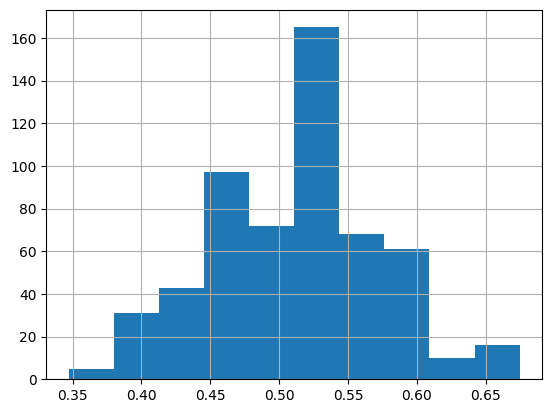

In [130]:
merged_df[merged_df.start_y.isnull()].GC_cont.hist()
merged_df.start_y.isnull().sum()